In [12]:
from pytorch_lightning import Trainer
%load_ext autoreload
%autoreload 2
from modules.packnet import PackNet
from datasets import split_cifar100, TaskLoader
from torchvision import transforms
from pytorch_lightning.callbacks import LearningRateMonitor


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])

task_group = split_cifar100(4, transform=transforms.Compose([
            transforms.Resize(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Files already downloaded and verified
Files already downloaded and verified


19

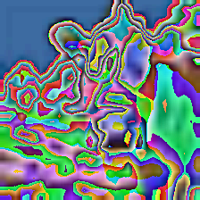

[10, 27, 76, 57, 90, 73, 94, 23, 54, 46, 55, 38, 59, 5, 12, 61, 6, 87, 75, 2, 84, 17, 83, 13, 21]
23 75 75 21 61 73 73 75 17 6 57 2 27 90 10 54 6 27 21 13 21 75 83 76 17 57 59 27 57 10 21 46 23 59 87 10 54 83 83 83 73 83 12 13 94 87 6 6 23 73 90 59 2 94 27 76 12 76 57 23 21 6 76 55 6 83 84 38 27 12 12 76 10 12 2 94 61 5 46 10 10 94 10 90 90 87 94 6 21 27 57 27 6 57 2 27 55 10 27 2 
90 23 17 59 87 59 84 17 21 84 76 90 73 87 6 55 83 27 46 75 38 23 46 83 75 73 55 61 84 59 94 38 46 87 76 87 27 46 54 21 12 61 46 94 73 2 46 21 54 90 90 21 13 38 10 54 23 23 46 2 46 57 23 90 57 5 13 6 84 12 10 2 83 5 10 75 54 57 87 73 54 87 12 73 23 84 21 76 12 87 55 2 10 27 46 83 87 59 5 21 

In [23]:

def show_img(instance):
    x, y = instance
    display(y, transforms.ToPILImage()(x).resize((200, 200)))
show_img(task_group[0].train_set[0])


print(task_group[1].classes)
for i in range(100):
    print(task_group[1].val_set[i][1], end=" ")
print()
for i in range(100):
    print(task_group[1].train_set[i][1], end=" ")

In [24]:
# print(task_group[0].train_set.indices)
pack_net = PackNet.load_from_checkpoint("/Scratch/al183/dynamic-dropout/packed_ae/lightning_logs/version_2/checkpoints/epoch=56-step=2678.ckpt")
trainer = Trainer(
    gpus=1, 
    max_epochs=500, 
    enable_checkpointing=True,
    log_every_n_steps=10,
    callbacks=[
        LearningRateMonitor("epoch"),
    ]
    )
task_loader = TaskLoader(task_group[0], 256, 8)
trainer.fit(pack_net, task_loader.train_loader, task_loader.val_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | network   | MobileNetV3      | 2.5 M 
1 | accuracy  | Accuracy         | 0     
2 | loss_func | CrossEntropyLoss | 0     
-----------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
10.171    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/Scratch/al183/miniconda3/envs/avalanche-env/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
